In [ ]:
!pip3 install tensorflow
!pip3 install keras
!pip install pydot
!pip install graphviz
!pip install pydotplus

In [1]:
#Libraries for data wrangling
import pandas as pd
import numpy as np
from PIL import Image
import glob
import json
import collections

#Data visualization
from matplotlib import pyplot as plt
import pickle

#Libraries for Modelling
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential 
from keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten, Activation, BatchNormalization

In [2]:
#Loading data frame with image labels and names
images_df = pd.read_csv("C:/Users/eugen/Desktop/Work/Convolution network/train.csv")
images_df.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [26]:
len(images_df)

21397

In [4]:
#Label metadata
label_def = json.load(open("C:/Users/eugen/Desktop/Work/Convolution network/label_num_to_disease_map.json", "r"))
label_def

{'0': 'Cassava Bacterial Blight (CBB)',
 '1': 'Cassava Brown Streak Disease (CBSD)',
 '2': 'Cassava Green Mottle (CGM)',
 '3': 'Cassava Mosaic Disease (CMD)',
 '4': 'Healthy'}

In [2]:
#Resizing of image
IMG_SIZE = (150, 150)
def pixels_from_path(file_path):
    im = Image.open(file_path)
    im = im.resize(IMG_SIZE)
    np_im = np.array(im)
    #matrix of pixel RGB values
    return np_im

In [5]:
im = Image.open("C:/Users/eugen/Desktop/Work/Convolution network/train_images/1000015157.jpg")
np.array(im).shape

(600, 800, 3)

In [6]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
#
resized_shape_counts = collections.defaultdict(int)
original_shape_counts = collections.defaultdict(int)
path = "C:/Users/eugen/Desktop/Work/Convolution network/train_images/*"

for i, cass in enumerate(glob.glob(path)[:1000]):
    if i%100==0:
        print(i)
    original_img_shape = np.array(Image.open(cass)).shape #loads image as np matrix and checks shape.
    original_shape_counts[str(original_img_shape)]= shape_counts[str(original_img_shape)]+ 1
    
    resized_img_shape = pixels_from_path(cass).shape #loads image as np matrix and checks shape.
    resized_shape_counts[str(resized_img_shape)]= shape_counts[str(resized_img_shape)]+ 1

#original_shape_items = list(original_shape_counts.items())
#original_shape_items.sort(key = lambda x: x[1])
print(original_shape_counts)

#resized_shape_items = list(resized_shape_counts.items())
#resized_shape_items.sort(key = lambda x: x[1])
print(resized_shape_counts)

## Preparing the Training set

In [ ]:
path = "C:/Users/eugen/Desktop/Work/Convolution network/train_images/*"
train_images = []
print("loading training cassava images...")
for img_ind in range(0,1000):
    check_path = 'C:/Users/eugen/Desktop/Work/Convolution network/train_images\\{}'.format(images_df.loc[img_ind,"image_id"])
    if check_path in glob.glob(path):
        train_images.append(pixels_from_path(check_path)) 
cassava_train_set = np.asarray(train_images)
print("Complete")        

test_images = []
print("loading testing cassava images...")
for img_ind in range(1000,1200):
    check_path = 'C:/Users/eugen/Desktop/Work/Convolution network/train_images\\{}'.format(images_df.loc[img_ind,"image_id"])
    if check_path in glob.glob(path):
        test_images.append(pixels_from_path(check_path))
cassava_test_set = np.asarray(test_images)
print("Complete")

In [15]:
#Targets
cassava_train_y = np.asarray(list(images_df.loc[0:999,"label"]))
cassava_test_y = np.asarray(list(images_df.loc[1000:1199,"label"]))

In [46]:
len(images_df.loc[images_df["label"]==4,].reset_index(drop=True))

2577

In [34]:
#################### Correcting class-imbalance through equal-class-sampling #########################
cassava_classes = [0,1,2,3,4]
path = "C:/Users/eugen/Desktop/Work/Convolution network/train_images/*"

cassava_train_y2 = []
cassava_test_y2 = []
train_images2 = []
test_images2 = []
print("Loading training and testing images....")
for cassava in cassava_classes:
    image_class_df = images_df.loc[images_df["label"]==cassava,].reset_index(drop=True)
    if cassava == 0 or cassava == 1 or cassava == 2 or cassava == 3:
        print("Class {} is appending".format(cassava))
        for i in range(0,500):
            check_path = 'C:/Users/eugen/Desktop/Work/Convolution network/train_images\\{}'.format(image_class_df.loc[i,"image_id"])
            if check_path in glob.glob(path):
                train_images2.append(pixels_from_path(check_path))
                cassava_train_y2.append(cassava)
        for i in range(500,700):
            check_path = 'C:/Users/eugen/Desktop/Work/Convolution network/train_images\\{}'.format(image_class_df.loc[i,"image_id"])
            if check_path in glob.glob(path):
                test_images2.append(pixels_from_path(check_path))
                cassava_test_y2.append(cassava)
    elif cassava == 4:
        print("Class {} is appending".format(cassava))
        for i in range(0,2377):
            check_path = 'C:/Users/eugen/Desktop/Work/Convolution network/train_images\\{}'.format(image_class_df.loc[i,"image_id"])
            if check_path in glob.glob(path):
                train_images2.append(pixels_from_path(check_path))
                cassava_train_y2.append(cassava)
        for i in range(2377,2577):
            check_path = 'C:/Users/eugen/Desktop/Work/Convolution network/train_images\\{}'.format(image_class_df.loc[i,"image_id"])
            if check_path in glob.glob(path):
                test_images2.append(pixels_from_path(check_path))
                cassava_test_y2.append(cassava)

cassava_train_set2 = np.asarray(train_images2)
cassava_train_y2 = np.asarray(cassava_train_y2)
cassava_test_set2 = np.asarray(test_images2)
cassava_test_y2 = np.asarray(cassava_test_y2)
print("Completed")

Loading training and testing images....
Class 0 is appending
Class 1 is appending
Class 2 is appending
Class 3 is appending
Class 4 is appending
Completed


In [35]:
for i in range(0,len(cassava_train_y2)):
    if cassava_train_y2[i] == 4:
        cassava_train_y2[i] = 0
    else:
        cassava_train_y2[i] = 1

for i in range(0,len(cassava_test_y2)):
    if cassava_test_y2[i] == 4:
        cassava_test_y2[i] = 0
    else:
        cassava_test_y2[i] = 1


In [38]:
type(cassava_train_y2[0])

numpy.int32

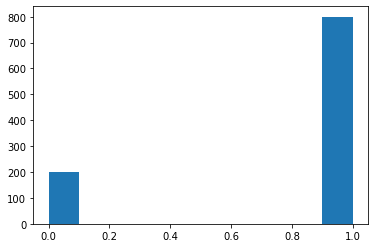

In [36]:
plt.hist(list(cassava_test_y2), align='mid')
plt.show()

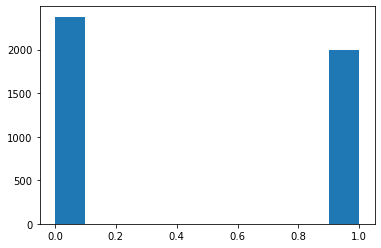

In [37]:
plt.hist(list(cassava_train_y2), align='mid')
plt.show()

In [38]:
#Saving processed data
pickle.dump(cassava_train_set2, open("C:/Users/eugen/Desktop/Work/Convolution network/saved_Xtrain.pickle.dat", "wb"))
pickle.dump(cassava_train_y2, open("C:/Users/eugen/Desktop/Work/Convolution network/saved_ytrain.pickle.dat", "wb"))

pickle.dump(cassava_test_set2, open("C:/Users/eugen/Desktop/Work/Convolution network/saved_Xtest.pickle.dat", "wb"))
pickle.dump(cassava_test_y2, open("C:/Users/eugen/Desktop/Work/Convolution network/saved_ytest.pickle.dat", "wb"))


In [2]:
#Loading train data into IDE
cassava_train_set2 = pickle.load(open("C:/Users/eugen/Desktop/Work/Convolution network/saved_Xtrain.pickle.dat", "rb"))
cassava_train_y2 = pickle.load(open("C:/Users/eugen/Desktop/Work/Convolution network/saved_ytrain.pickle.dat", "rb"))

cassava_test_set2 = pickle.load(open("C:/Users/eugen/Desktop/Work/Convolution network/saved_Xtest.pickle.dat", "rb"))
cassava_test_y2 = pickle.load(open("C:/Users/eugen/Desktop/Work/Convolution network/saved_ytest.pickle.dat", "rb"))

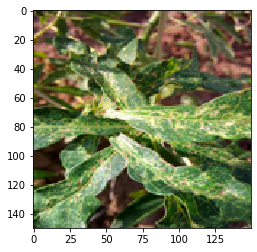

In [3]:
plt.imshow(cassava_train_set2[1017], interpolation='nearest')
plt.show()

In [5]:
cassava_train_y2[1017]

1

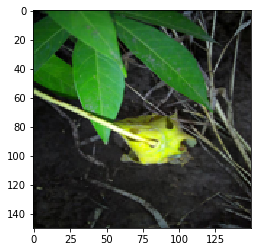

In [40]:
plt.imshow(cassava_train_set2[3500], interpolation='nearest')
plt.show()

In [6]:
cassava_train_y2[3500]

0

In [41]:
dict_counts = {}
for i in range(0,len(cassava_train_y2)):
    list_keys = list(dict_counts.keys())
    cassava_list = list(cassava_train_y2)
    if str(cassava_list[i]) in list_keys:
        dict_counts[str(cassava_list[i])] = dict_counts[str(cassava_list[i])] + 1
    else:
        dict_counts[str(cassava_list[i])] = 1
    
        
dict_counts
        

{'1': 2000, '0': 2377}

In [51]:
len(cassava_train_set2)

4377

## Training the convolution neural networks

In [5]:
IMG_SIZE

(150, 150)

In [3]:
cassava_train_set2 = (cassava_train_set2)/255.0
cassava_train_set2[0]

array([[[0.14117647, 0.34509804, 0.42745098],
        [0.16078431, 0.34509804, 0.39215686],
        [0.14117647, 0.36078431, 0.34901961],
        ...,
        [0.34901961, 0.41176471, 0.21960784],
        [0.36862745, 0.44705882, 0.23921569],
        [0.35686275, 0.42745098, 0.23529412]],

       [[0.10980392, 0.3254902 , 0.34901961],
        [0.1372549 , 0.33333333, 0.36078431],
        [0.15294118, 0.35294118, 0.38039216],
        ...,
        [0.22745098, 0.20784314, 0.1254902 ],
        [0.25490196, 0.22745098, 0.15294118],
        [0.3254902 , 0.31372549, 0.14901961]],

       [[0.16470588, 0.35294118, 0.3372549 ],
        [0.10980392, 0.32941176, 0.33333333],
        [0.09411765, 0.31764706, 0.34117647],
        ...,
        [0.41176471, 0.53333333, 0.17647059],
        [0.2745098 , 0.36470588, 0.15294118],
        [0.39215686, 0.49803922, 0.17254902]],

       ...,

       [[0.05882353, 0.19215686, 0.00392157],
        [0.06666667, 0.18823529, 0.00392157],
        [0.07843137, 0

In [7]:
cassava_train_set2.shape

(4377, 150, 150, 3)

In [ ]:
#First block of layers
model = Sequential()
model.add(Conv2D(35,kernel_size=5,activation='relu', input_shape=cassava_train_set2.shape[1:],padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

#Next 2 block of layers
for filters in [70,140]:
    model.add(Conv2D(filters,activation='relu',kernel_size=5,padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
    
#Dense layer    
model.add(Flatten())
#model.add(Dense(128))
    
model.add(Dropout(0.3)) #Controlling overfitting
    
model.add(Dense(1)) #Output layer
model.add(Activation("sigmoid"))

#Fitting and optimizing the model
customAdam = keras.optimizers.Adam(lr=1e-3)
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=customAdam)
model.fit(cassava_train_set2, cassava_train_y2, epochs=12, batch_size=45, verbose=2,validation_split=0.2)
    

In [10]:
model.save("C:/Users/eugen/Desktop/Work/Convolution network/model.h5")

In [6]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [7]:
def metrics(target,prediction):
    print("**********************")
    print("Recall : ",recall_score(target, prediction, average='binary')*100)
    print("**********************")
    print("Precission : ", precision_score(target, prediction, average='binary')*100 )
    print("**********************")
    print("F1 score : ", f1_score(target, prediction, average='binary')*100 )

In [8]:
metrics(cassava_test_y2,model.predict_classes(cassava_test_set2/255))

C:\Users\eugen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**********************
Recall :  87.75
**********************
Precission :  80.7825086306099
**********************
F1 score :  84.12222887956861


In [9]:
accuracy_score(cassava_test_y2,model.predict_classes(cassava_test_set2/255))*100

C:\Users\eugen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


73.5

In [8]:
loaded_model = keras.models.load_model("C:/Users/eugen/Desktop/Work/Convolution network/model.h5")

In [17]:

accuracy_score(cassava_test_y2,loaded_model.predict_classes(cassava_test_set2/255))*100

C:\Users\eugen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


64.7

In [47]:
metrics(cassava_test_y2,loaded_model.predict_classes(cassava_test_set2/255))

C:\Users\eugen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**********************
Recall :  71.0
**********************
Precission :  82.43831640058055
**********************
F1 score :  76.29281396910677


In [12]:
list(model.predict(cassava_train_set2[3500].reshape(1,150,150,3))[0])[0]*100

78.94030809402466

In [17]:
model.predict(cassava_train_set2[3500].reshape(1,150,150,3))[0][0]

0.7894031

In [13]:
round(78.94030809402466,3)

78.94

In [45]:
list(loaded_model.predict(cassava_train_set2[3500].reshape(1,150,150,3))[0])[0]

1.0